## Données de Haute-Frequence - Lab 1
ZHANG Mian
CentraleSupélec

## 0. Imports and data loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import scipy.stats
#import powerlaw
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import powerlaw
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path = "/content/drive/MyDrive/TOTF.PA/"
l = os.listdir(path)
dfs = []
for name in l:
    if "trades" in name:
        df = pd.read_csv(path+name)
        df["ts"] = pd.to_datetime(df["ts"])
        df["time_in_s"] = df["ts"].dt.hour*3600 + df["ts"].dt.minute*60 + df["ts"].dt.second + df["ts"].dt.microsecond/1000000
        dfs += [df]

In [ ]:
# the trading data in 2017-01-02
dfs[0]

,Unnamed: 0,ts,price,volume,time_in_s
0,0,2017-01-02 09:00:15.576,48.470,100,32415.576
1,1,2017-01-02 09:00:15.576,48.465,113,32415.576
2,2,2017-01-02 09:00:15.576,48.465,100,32415.576
3,3,2017-01-02 09:00:29.442,48.500,216,32429.442
4,4,2017-01-02 09:00:38.125,48.500,177,32438.125
...,...,...,...,...,...
6880,6880,2017-01-02 17:29:57.491,48.655,328,62997.491
6881,6881,2017-01-02 17:29:57.491,48.655,328,62997.491
6882,6882,2017-01-02 17:29:57.491,48.650,722,62997.491
6883,6883,2017-01-02 17:29:57.551,48.645,410,62997.551


## 1. Overview of the data
1.1 Plot the number of trades per day, as well as its average on the full sample.

1.2 Plot the evolution of the transaction price on the sample.

1.3 Compute the ticksize in your data. Is this value in line with the Euronext trading rules ?

###1.1 Plot the number of trades per day, as well as its average on the full sample.



average number of trades is 16091.272727272728


Text(0.5, 1.0, 'The daily trading volume')

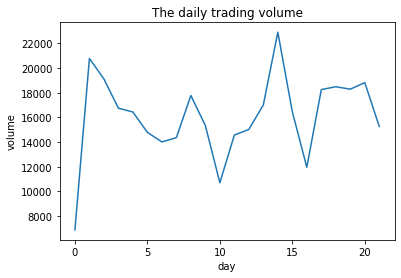

In [4]:
n_trades = []
for df in dfs:
    n_trades += [df.shape[0]]

print("average number of trades is {}".format(np.mean(n_trades)))
fig,ax = plt.subplots()
ax.plot(n_trades)
ax.set_xlabel("day")
ax.set_ylabel("volume")
ax.set_title('The daily trading volume')


###1.2 Evolution price
The evolution price of the trading of 2017-01-02. 

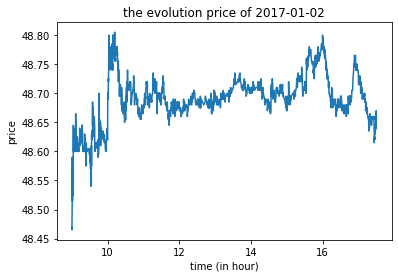

In [13]:
df = dfs[0]
plt.title('the evolution price of 2017-01-02')
plt.ylabel('price')
plt.xlabel('time (in hour)')
plt.plot(df["time_in_s"]/3600,df["price"])
plt.show()

### 1.3 Ticket Size

In [24]:
m = np.min(dfs[0]["price"])
M = np.max(dfs[0]["price"])
for df in dfs:
    m = min(m,np.min(df["price"]))
    M = max(M,np.max(df["price"]))
print('The maximum price is {}'.format(M))
print('The minimum price is {}'.format(m))

The maximum price is 49.5
The minimum price is 46.385


Because the prices are between 10 and 50, we expect a ticksize of 0.05

In [20]:
tick = 1
for df in dfs:    
    p1 = df["price"][0:-1].to_numpy()
    p2 = df["price"][1:].to_numpy()
    d = np.abs(p1-p2)
    tick = min(tick,np.min(d[d>0]))

print('The minimum ticket size is {}'.format(tick))

The minimum ticket size is 0.0049999999999954525


The tick is 0.05 (to a rounding error).

## 2. Trade durations

2.1 Plot an histogram of the empirical density of the trade durations, in both linear and log-log scale. 

2.2 Add an exponential fit to the histograms (e.g., using scipy.stats.expon(...)).

2.3 Rejects the hypothesis that a power law is a good fit of the duration distribution, but finds that Weibull distributions can be good candidates. Are your observations in line with this paper ?

In [32]:
ds = []
for df in dfs:   
    z = df["time_in_s"].to_numpy()
    z1 = z[0:-1] 
    z2 = z[1:]
    durations = z2-z1
    ds += [durations]
    
durations = np.concatenate(ds) 

In [37]:
ds = []
for df in dfs:   
    z = df["time_in_s"].to_numpy()
    z1 = z[0:-1]
    z2 = z[1:]
    durations = z2-z1
    ds += [durations] 

durations = durations[durations>0] 

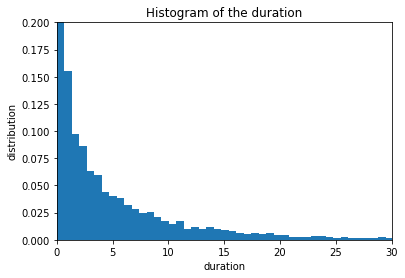

In [43]:
fig,ax = plt.subplots()
ax.set_xlabel("duration")
ax.set_ylabel("distribution")
ax.set_title('Histogram of the duration')
ax.set_xlim((0,30))
ax.set_ylim((0,0.2))
ax.hist(durations,bins = 100,density = True);

In [40]:
l,s = scipy.stats.expon.fit(durations)
print(l,s)

0.000999999996565748 4.352108708028478


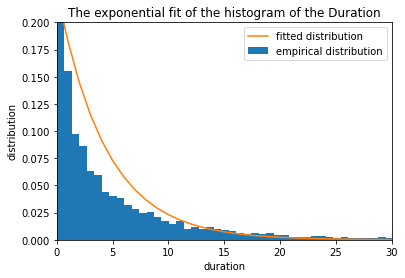

In [42]:
fig,ax = plt.subplots()
ax.hist(durations,bins = 100,density = True);
x = np.concatenate([np.arange(0.01,1,0.01),np.arange(1,250,1)])
y = scipy.stats.expon.pdf(x,loc = l, scale = s)
ax.plot(x,y)
ax.set_xlabel("duration")
ax.set_ylabel("distribution")
ax.set_title('The exponential fit of the histogram of the Duration')
ax.set_xlim((0,30))
ax.set_ylim((0,0.2))
ax.legend(["fitted distribution","empirical distribution"]);

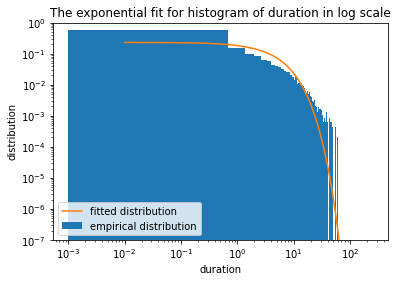

In [44]:
fig,ax = plt.subplots()
ax.hist(durations,bins = 100,density = True);
ax.plot(x,y)
ax.set_xlabel("duration")
ax.set_ylabel("distribution")
ax.set_title('The exponential fit for histogram of duration in log scale')
ax.set_ylim(10**-7,1)
plt.xscale("log")
plt.yscale("log")
ax.legend(["fitted distribution","empirical distribution"])

The empirical distribution as an heavier tail than the empirical one

In [ ]:
!pip install powerlaw

Calculating best minimal value for power law fit
The xmin of the powerlaw result is 13.57100000000355
The alpha of the powerlaw result is 3.2324692413027476


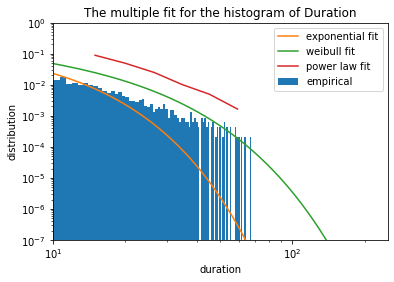

In [57]:
#from scipy.stats import powerlaw
import powerlaw
result = powerlaw.Fit(durations)

print('The xmin of the powerlaw result is {}'.format(result.power_law.xmin))
print('The alpha of the powerlaw result is {}'.format(result.power_law.alpha))

c,l,s = scipy.stats.weibull_min.fit(durations[durations > result.power_law.alpha])
y1 = scipy.stats.weibull_min.pdf(x,c=c,loc = l, scale = s)

fig,ax = plt.subplots()
ax.set_title('The multiple fit for the histogram of Duration')
ax.hist(durations,bins = 100,density = True)
ax.set_ylim(10**-7,1)
ax.set_xlim(10,250)
ax.plot(x,y)
ax.plot(x,y1)
result.plot_pdf()
plt.yscale("log")
plt.xscale("log")
ax.set_xlabel("duration")
ax.set_ylabel("distribution")
ax.legend(["exponential fit","weibull fit","power law fit","empirical"])

We can see that a weibull distribution fits the tail of the empirical distribution better.

## 3. Trade volumes
3.1 Plot a histogram of the empirical density of the trade sizes, in both linear and log-log scale.

3.2 Add an exponential fit to the histograms.

3.3 Add an power-law fit of the tail of the distribution to the log-log histogram. You should use the powerlaw package. For each stock, plot the empirical distribution of sizes and a fitted exponential distribution in semi-log scale.

3.4 Lists several studies finding tail exponents around 2.5 for transactions volumes. Are your observations in line with these previous contributions ?

In [58]:
vs = []
for df in dfs:   
    z = df["volume"].to_numpy()
    vs += [z]
    
volumes = np.concatenate(vs)

In [59]:
l,s = scipy.stats.expon.fit(volumes)
x = np.arange(np.min(volumes),np.max(volumes),10)
y = scipy.stats.expon.pdf(x,loc = l, scale = s)

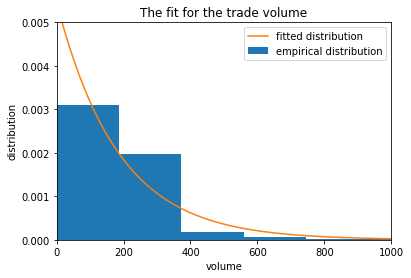

In [61]:
fig,ax = plt.subplots()
ax.set_title('The fit for the trade volume')
ax.hist(volumes,bins = 100,density = True);
ax.plot(x,y)
ax.set_xlabel("volume")
ax.set_ylabel("distribution")
ax.set_xlim((0,1000))
ax.set_ylim((0,0.005))
ax.legend(["fitted distribution","empirical distribution"]);

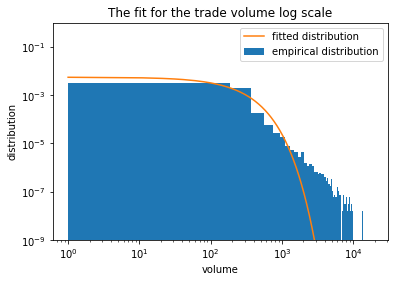

In [64]:
fig,ax = plt.subplots()
ax.set_title('The fit for the trade volume log scale')
ax.set_ylim(10**-9,1)
ax.hist(volumes,bins = 100,density = True);
ax.plot(x,y)
ax.set_xlabel("volume")
ax.set_ylabel("distribution")
ax.legend(["fitted distribution","empirical distribution"])
plt.yscale("log")
plt.xscale("log")

In [65]:
result = powerlaw.Fit(volumes)

Calculating best minimal value for power law fit


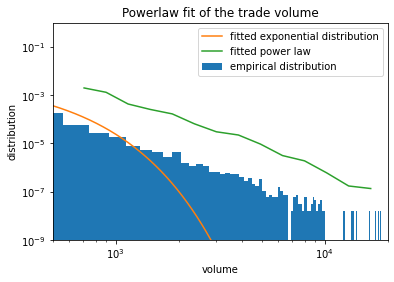

In [67]:
fig,ax = plt.subplots()
ax.set_title('Powerlaw fit of the trade volume')
ax.set_ylim(10**-9,1)
ax.set_xlim(500,20000)
ax.hist(volumes,bins = 100,density = True)
ax.plot(x,y)
result.plot_pdf()
plt.yscale("log")
plt.xscale("log")
ax.set_xlabel("volume")
ax.set_ylabel("distribution")
ax.legend(["fitted exponential distribution","fitted power law","empirical distribution"]);

In [68]:
result.power_law.alpha

2.856233026766682

The exponential fit does not have tail heavy enough. The exponential fit is better, and we find a value of $\alpha$ close to 2.5 as expected.

## 4. Intraday trading activity
4.1 For each day of the sample, compute the number of trades per bins of 1 minute and plot the median daily profile. You should use the resample function of pandas.

4.2 Comment the observed profile.

In [69]:
volumes = []

for df in dfs:
    mvols = df.resample("1T",on = "ts").sum()["volume"].to_numpy() #dataframe每个分钟采样
    volumes += [mvols]

In [70]:
df.resample("2T",on = "ts").sum()

,Unnamed: 0,price,volume,time_in_s
ts,,,,
2017-01-31 09:00:00,1596,2662.010,13231.0,1.849433e+06
2017-01-31 09:02:00,1890,1261.310,3206.0,8.796380e+05
2017-01-31 09:04:00,3895,1776.725,5307.0,1.243148e+06
2017-01-31 09:06:00,16272,4485.400,14204.0,3.149275e+06
2017-01-31 09:08:00,9758,1916.470,7786.0,1.350769e+06
...,...,...,...,...
2017-01-31 17:20:00,2536100,8219.405,35548.0,1.092998e+07
2017-01-31 17:22:00,1889076,6053.860,21976.0,8.073886e+06
2017-01-31 17:24:00,2009604,6383.440,24756.0,8.527933e+06


In [71]:
median_vols = np.median(volumes,axis = 0)

In [72]:
median_vols.shape

(510,)

Text(0, 0.5, 'median of traded volume')

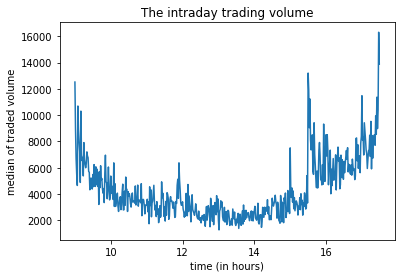

In [74]:
fig,ax = plt.subplots()
T = 1/60*np.arange(0,len(median_vols),1) + 9
ax.plot(T,median_vols)
ax.set_title('The intraday trading volume')
ax.set_xlabel("time (in hours)")
ax.set_ylabel("median of traded volume")

As expected, the trading activity is more important in the morning and in the evening, with a spike around 4PM for the opening of the american markets.

## 5. High-frequency log-returns and trading activity
5.1 Plot the complementary cumulative empirical distribution function of the absolute log-returns sampled every 1, 5 and 15 minutes. Add a Gaussian reference to the plot. Comment.

5.2 Plot the variance of the log-returns every N trades as a function of N. Comment.

5.3 Plot the variance of the log-returns every T minutes and the mean number of trades every T minutes, as a function of T (use one graph with two y-axes). Comment.

5.4 Suggests that log-returns in event time are Gaussian. Is this observation valid on your sample ?

In [75]:
def logs(T):
    logs = []
    for df in dfs:
        dfT = df.resample(str(T)+"T",on = "ts").agg("first")
        log = np.log(dfT.price) - np.log(dfT.price.shift(1))
        log = log.dropna().to_numpy()
        logs += [log]
    logs = np.concatenate(logs)
    logs = logs-np.mean(logs)
    logs = logs/np.std(logs)
    return np.abs(logs)

In [77]:
dfs[0].resample("1T",on = "ts").agg('first')

,Unnamed: 0,ts,price,volume,time_in_s
ts,,,,,
2017-01-02 09:00:00,0.0,2017-01-02 09:00:15.576,48.470,100.0,32415.576
2017-01-02 09:01:00,10.0,2017-01-02 09:01:04.474,48.530,91.0,32464.474
2017-01-02 09:02:00,23.0,2017-01-02 09:02:02.891,48.525,8010.0,32522.891
2017-01-02 09:03:00,134.0,2017-01-02 09:03:01.969,48.600,472.0,32581.969
2017-01-02 09:04:00,148.0,2017-01-02 09:04:09.736,48.615,149.0,32649.736
...,...,...,...,...,...
2017-01-02 17:25:00,6720.0,2017-01-02 17:25:19.176,48.660,176.0,62719.176
2017-01-02 17:26:00,6739.0,2017-01-02 17:26:04.745,48.655,23.0,62764.745
2017-01-02 17:27:00,6785.0,2017-01-02 17:27:05.411,48.625,300.0,62825.411


In [79]:
logs1 = np.sort(logs(1))
logs5 = np.sort(logs(5))
logs15 = np.sort(logs(15))

(0.0, 4.0)

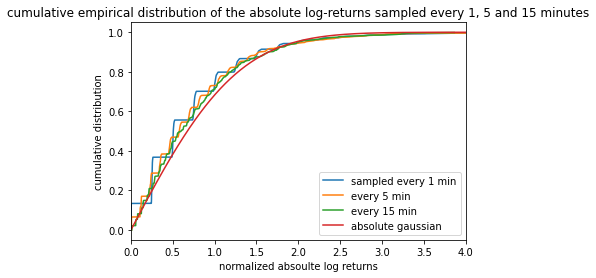

In [80]:
fig,ax = plt.subplots()
ax.set_title('cumulative empirical distribution of the absolute log-returns sampled every 1, 5 and 15 minutes')
ax.plot(logs1,np.arange(0,1,1/logs1.shape[0]))
ax.plot(logs5,np.arange(0,1,1/logs5.shape[0]))
ax.plot(logs15,np.arange(0,1,1/logs15.shape[0]))
x = np.arange(0,8,1/100)
ax.plot(x,scipy.stats.norm.cdf(x) - scipy.stats.norm.cdf(-x))
ax.set_xlabel("normalized absoulte log returns")
ax.set_ylabel("cumulative distribution")
ax.legend(["sampled every 1 min","every 5 min","every 15 min","absolute gaussian"])
ax.set_xlim(0,4)

In [82]:
x = np.arange(0,1,0.01)
scipy.stats.norm.cdf(x)

array([0.5       , 0.50398936, 0.50797831, 0.51196647, 0.51595344,
       0.51993881, 0.52392218, 0.52790317, 0.53188137, 0.53585639,
       0.53982784, 0.54379531, 0.54775843, 0.55171679, 0.55567   ,
       0.55961769, 0.56355946, 0.56749493, 0.57142372, 0.57534543,
       0.57925971, 0.58316616, 0.58706442, 0.59095412, 0.59483487,
       0.59870633, 0.60256811, 0.60641987, 0.61026125, 0.61409188,
       0.61791142, 0.62171952, 0.62551583, 0.62930002, 0.63307174,
       0.63683065, 0.64057643, 0.64430875, 0.64802729, 0.65173173,
       0.65542174, 0.65909703, 0.66275727, 0.66640218, 0.67003145,
       0.67364478, 0.67724189, 0.68082249, 0.6843863 , 0.68793305,
       0.69146246, 0.69497427, 0.69846821, 0.70194403, 0.70540148,
       0.70884031, 0.71226028, 0.71566115, 0.71904269, 0.72240468,
       0.72574688, 0.7290691 , 0.73237111, 0.73565271, 0.7389137 ,
       0.74215389, 0.74537309, 0.7485711 , 0.75174777, 0.75490291,
       0.75803635, 0.76114793, 0.7642375 , 0.76730491, 0.77035

The distributions are all similar.

In [84]:
def varlogs(N):
    logs = []
    for df in dfs:
        log = np.log(df.price) - np.log(df.price.shift(N))
        log = log.dropna().to_numpy()
        logs += [log]
    logs = np.concatenate(logs)
    return np.var(logs)

print(varlogs(2))

1.1488446517836206e-08


Text(0, 0.5, 'variance of log returns')

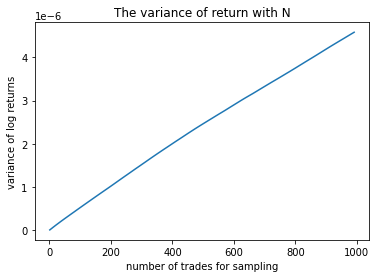

In [86]:
vas = []
for n in range(1,1000,10):
    vas += [varlogs(n)]

fig,ax = plt.subplots()
ax.set_title('The variance of return with N')
ax.plot(range(1,1000,10),vas)
ax.set_xlabel("number of trades for sampling")
ax.set_ylabel("variance of log returns")

As expected, the variance of log returns is strongly correlated with the market activity.

In [87]:
def varlogs_t(T):
    logs = []
    for df in dfs:
        dfT = df.resample(str(T)+"T",on = "ts").agg("first")
        log = np.log(dfT.price) - np.log(dfT.price.shift(1))
        log = log.dropna().to_numpy()
        logs += [log]
    logs = np.concatenate(logs)
    return np.var(logs)

def mean_trades(T):
    trades = []
    for df in dfs:
        df["trades"] = 1
        dfT = df.resample(str(T)+"T",on = "ts").agg("sum")
        trades += [dfT["trades"]]
    trades = np.concatenate(trades)
    return np.mean(trades)

In [88]:
means = []
vas = []
for n in range(1,100):
    vas += [varlogs_t(n)]
    means += [mean_trades(n)]

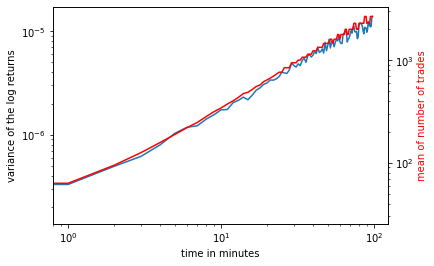

In [89]:
fig,ax = plt.subplots()
ax.plot(vas)
ax.set_xlabel("time in minutes")
ax.set_ylabel("variance of the log returns")
ax2 = ax.twinx()
ax2.plot(means,c = "red")
ax2.set_ylabel("mean of number of trades",c = "red")
ax2.set_yscale("log")
ax.set_yscale("log")
plt.xscale("log")

As expected, trading activity and variance of the log returns are correlated